In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore", message="Boolean Series key will be reindexed to match DataFrame index")

In [2]:
insur = pd.read_csv('Pacmann - Insurance.csv')
insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
main_df = insur.copy()
len(main_df), len(main_df[main_df.bmi > 25]), len(main_df[main_df.bmi <= 25])

(1338, 1091, 247)

# Descriptive Statistic
### 1. Berapa rata-rata umur pada dataset?

In [4]:
main_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [38]:
avg = main_df.age.mean().round(1)
avg_female = main_df[main_df.sex == 'female']['age'].mean().round(1)
avg_male = main_df[main_df.sex == 'male']['age'].mean().round(1)

print(f'Average: {avg}')
print(f'Average Female: {avg_female}')
print(f'Average Male: {avg_male}')

Average: 39.2
Average Female: 39.5
Average Male: 38.9


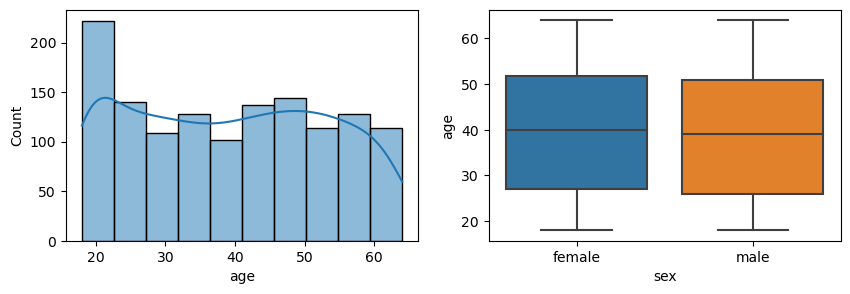

In [39]:
fig, ax = plt.subplots(nrows = 1,
                       ncols = 2,
                       figsize = (10, 3))

sns.histplot(data = main_df,
             x = 'age',
             bins = 10,
             kde = True,
             ax = ax[0])

sns.boxplot(data = main_df,
            x = 'sex',
            y = 'age',
            ax = ax[1])
plt.show()

### 2. Berapa rata-rata BMI perokok?

In [40]:
# Filtering data frame hanya yg merokok
smoking_df = main_df[main_df.smoker == 'yes'][['bmi', 'sex']].reset_index()
print(f'Average BMI: {smoking_df.bmi.mean().round(1)}')

Average BMI: 30.7


Average BMI: 30.7


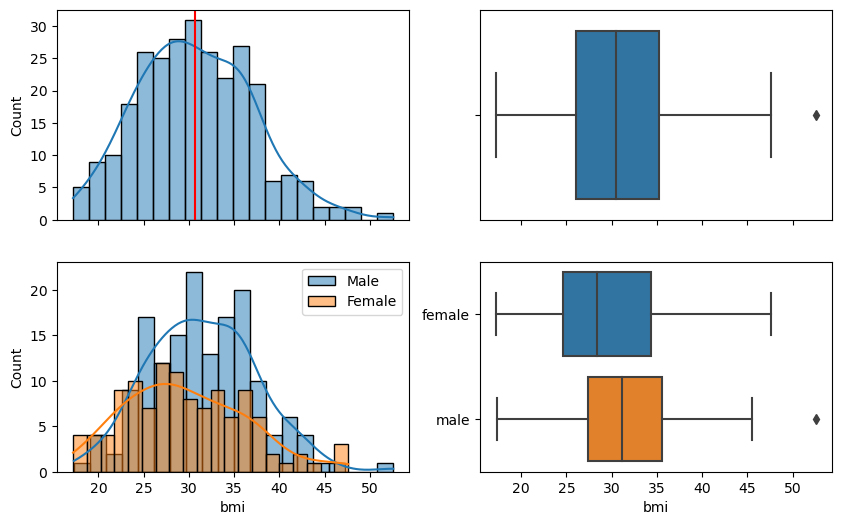

In [7]:
fig, ax = plt.subplots(nrows = 2,
                       ncols = 2,
                       figsize = (10, 6),
                       sharex = True)

sns.histplot(data = smoking_df,
             x = 'bmi',
             bins = 20,
             kde = True,
             ax = ax[0, 0])

sns.histplot(data = smoking_df[smoking_df.sex== 'male'],
             x = 'bmi',
             bins = 20,
             kde = True,
             label = 'Male',
             ax = ax[1, 0])

sns.histplot(data = smoking_df[smoking_df.sex== 'female'],
             x = 'bmi',
             bins = 20,
             kde = True,
             label = 'Female',
             ax = ax[1, 0])

sns.boxplot(data = smoking_df,
            x = 'bmi',
            ax = ax[0, 1])

sns.boxplot(data = smoking_df,
            x = 'bmi',
            y = 'sex',
            ax = ax[1, 1])

ax[1, 1].set_ylabel(' ')
ax[0, 1].set_xlabel(' ')
ax[1, 0].legend()
ax[0,0].axvline(smoking_df['bmi'].mean(), color="r")

plt.show()

### 3. Apakah varians dari tagihan kesehatan perokok dan non perokok sama?

In [8]:
smoking_var = main_df[main_df.smoker == 'yes'].charges.var()
non_smoking_var = main_df[main_df.smoker == 'no'].charges.var()

print(f'Varians perokok: {smoking_var:,.0f}')
print(f'Varians non perokok: {non_smoking_var:,.0f}')
print(f'Apakah varians keduanya sama? - {"Sama" if smoking_var == non_smoking_var else "Tidak sama"}')

Varians perkok: 133,207,311
Varians non perkok: 35,925,420
Apakah varians keduanya sama? - Tidak sama


### 4. Apakah rata-rata umur perempuan dan laki-laki perokok sama?

In [41]:
male_smoking = main_df[(main_df.sex == 'male') & (main_df.smoker == 'yes')]['age'].mean().round(2)
female_smoking = main_df[(main_df.sex == 'female') & (main_df.smoker == 'yes')]['age'].mean().round(2)

print(f'Average usia perempuan perokok: {male_smoking}')
print(f'Average usia laki-laki perokok: {female_smoking}')
print(f'Apakah average keduanya sama? - {"Average sama" if male_smoking == female_smoking else "Average tidak sama"}')

Average usia perempuan perokok: 38.45
Average usia laki-laki perokok: 38.61
Apakah average keduanya sama? - Average tidak sama


### 5. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [44]:
smoke_charge = main_df[main_df.smoker == 'yes'].charges.mean()
no_smoke_charge = main_df[main_df.smoker == 'no'].charges.mean()

print(f'Average tagihan perokok: {smoke_charge:,.0f}')
print(f'Average tagihan non perkokok: {no_smoke_charge:,.0f}')
print(f'''Jadi, makah yang lebih tinggi? -
      {"Perokok lebih tinggi" if smoke_charge > no_smoke_charge else "Non perokok lebih tinggi"}''')

Average tagihan perokok: 32,050
Average tagihan non perkokok: 8,434
Jadi, makah yang lebih tinggi? -
      Perokok lebih tinggi


# Discrete Variable
### 1. Gender mana yang memiliki tagihan paling tinggi?

In [64]:
highest = charge_proportion.charges.max()
highest

13956.751177721893

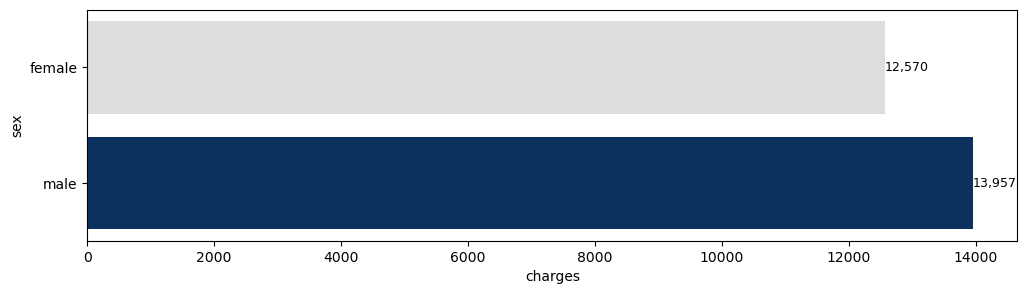

In [66]:
charge_proportion = main_df.groupby('sex')['charges'].mean().reset_index()

# define the highest value
highest = charge_proportion.charges.max()

# setting color for the highest value
colors = ['#002F6C' if val == highest else '#DDDDDD' for val in charge_proportion.charges]

fig, ax = plt.subplots(figsize = (12, 3))
sns.barplot(data = charge_proportion,
            x = 'charges',
            y = 'sex',
            ax = ax,
            palette = colors)

for cont in ax.containers:
    labels = [f'{total:,.0f}' for total in cont.datavalues]
    ax.bar_label(cont, labels, fontsize=9)

plt.show()

### 2. Apakah setiap region memiliki proporsi data banyak orang yang sama?

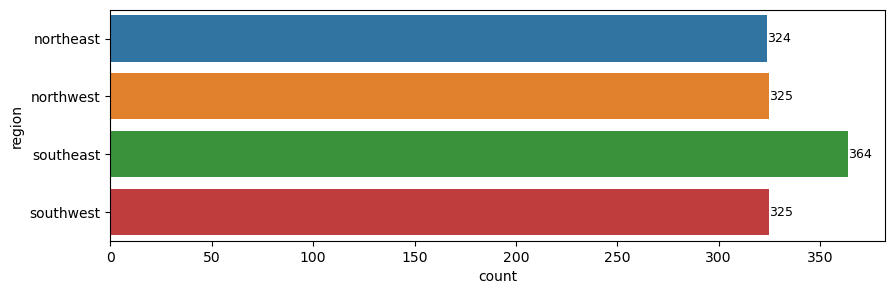

In [82]:
regions = main_df.groupby('region')['sex'].count().reset_index()
regions = regions.rename(columns={'sex': 'count'})

fig, ax = plt.subplots(figsize = (10, 3))
sns.barplot(data = regions,
            x = 'count',
            y = 'region',
            ax = ax)

for cont in ax.containers:
    labels = [f'{total:,.0f}' for total in cont.datavalues]
    ax.bar_label(cont, labels, fontsize=9)
    
plt.show()

### 3. Mana yang lebih tinggi proporsi perokok atau non perokok?

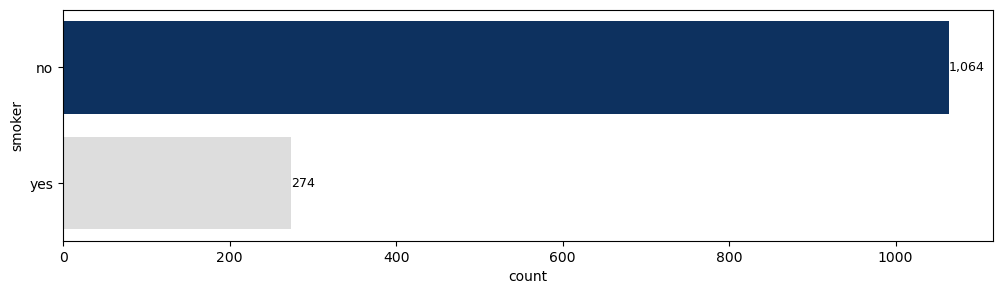

In [93]:
smoke_proportion = main_df.groupby('smoker')['sex'].count().reset_index()
smoke_proportion = smoke_proportion.rename(columns={'sex': 'count'})

# define the highest value
highest = smoke_proportion['count'].max()

# setting color for the highest value
colors = ['#002F6C' if val == highest else '#DDDDDD' for val in smoke_proportion['count']]

fig, ax = plt.subplots(figsize = (12, 3))
sns.barplot(data = smoke_proportion,
            x = 'count',
            y = 'smoker',
            ax = ax,
            palette = colors)

for cont in ax.containers:
    labels = [f'{total:,.0f}' for total in cont.datavalues]
    ax.bar_label(cont, labels, fontsize=9)

plt.show()

### 4. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [14]:
smokers = main_df[main_df.smoker == 'yes']
smokers = smokers.groupby('sex')['region'].count().reset_index()
smokers = smokers.rename(columns={'region': 'count'})
smokers['proba'] = (smokers['count'] / smokers['count'].sum()).round(3)
smokers_female = smokers[smokers.sex == 'female']['proba'][0]
smokers_female

print(f'Peluang dari perempuan diketahui dia perokok adalah sebesar: {smokers_female}')

Peluang dari perempuan diketahui dia perokok adalah sebesar: 0.42


### 5. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [15]:
smokers_male = smokers[smokers.sex == 'male']['proba'][1]

print(f'Peluang dari pria diketahui dia perokok adalah sebesar: {smokers_male}')

Peluang dari pria diketahui dia perokok adalah sebesar: 0.58


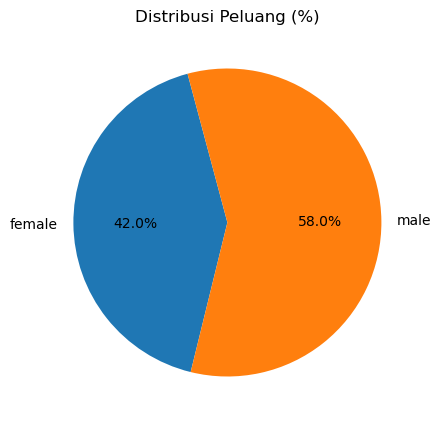

In [166]:
# Create a pie chart
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed
sns.set_palette("tab10")  # Set color palette

# Create the pie chart using the pie() function
plt.pie(smokers['proba'], labels=smokers.sex, autopct='%1.1f%%', startangle=105)

plt.title('Distribusi Peluang (%)')
plt.show()

# Continuous Variable
### 1. Mana yang lebih mungkin terjadi
    a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
    b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

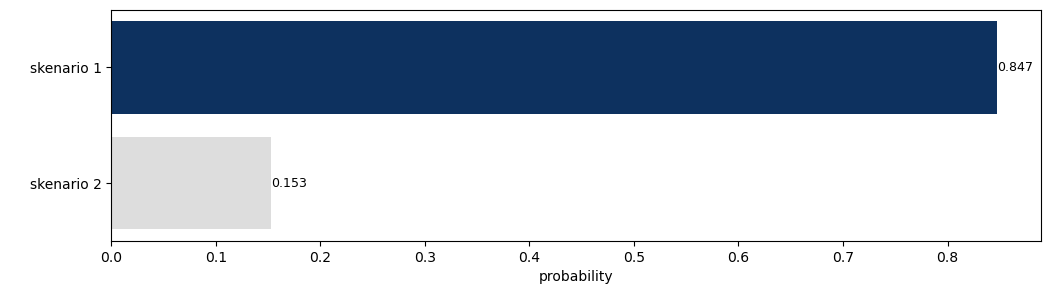

Sehingga, yang lebih mungkin terjadi adalah Seseorang dengan BMI diatas 25 
mendapatkan tagihan kesehatan diatas 16.7rb dengan probabilitas sebesar 0.8473053892215568


In [213]:
# memfilter dataset hanya untuk kondisi yang sudah ditentukan
dataset = main_df[main_df.charges > 16700]
devider = len(dataset)

# membuat jumlah data berdasarkan setiap kondisi
condition_1 = len(dataset[dataset.bmi > 25])
condition_2 = len(dataset[dataset.bmi <= 25])

# probability dari setiap kondisi
proba_1 = condition_1 / devider
proba_2 = condition_2 / devider

# menjadikan dataframe
data = {'skenario': ['skenario 1', 'skenario 2'],
        'probability': [proba_1, proba_2]}
continuous1_var_df = pd.DataFrame(data)

# define the highest value
highest = continuous1_var_df['probability'].max()

# setting color for the highest value
colors = ['#002F6C' if val == highest else '#DDDDDD' for val in continuous1_var_df['probability']]

fig, ax = plt.subplots(figsize = (12, 3))
sns.barplot(data = continuous1_var_df,
            x = 'probability',
            y = 'skenario',
            ax = ax,
            palette = colors)

for cont in ax.containers:
    labels = [f'{total:,.3f}' for total in cont.datavalues]
    ax.bar_label(cont, labels, fontsize=9)

ax.set_ylabel(' ')

plt.show()

print(f'Sehingga, yang lebih mungkin terjadi adalah Seseorang dengan BMI diatas 25 \nmendapatkan tagihan kesehatan diatas 16.7rb dengan probabilitas sebesar {proba_1}')

### 2. Mana yang lebih mungkin terjadi
    a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
    b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

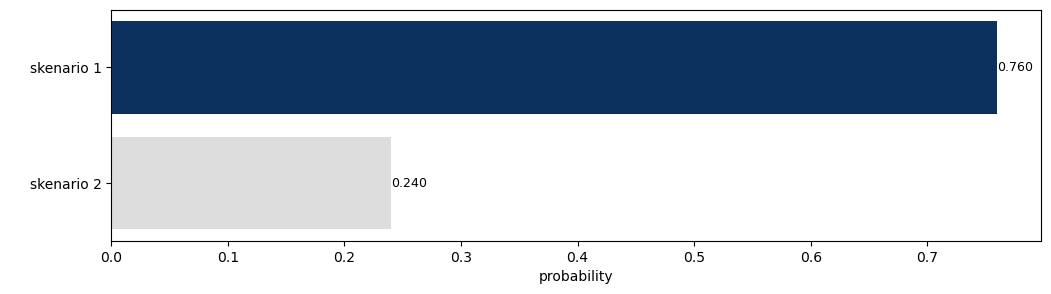

Sehingga, yang lebih mungkin terjadi adalah seseorang perokok dengan 
BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7rb dengan probabilitas sebesar 0.7597173144876325


In [215]:
# memfilter dataset hanya untuk kondisi yang sudah ditentukan
dataset = main_df[main_df.bmi > 25][main_df.charges > 16700]
devider = len(dataset)

# membuat jumlah data berdasarkan setiap kondisi
condition_1 = len(dataset[dataset.smoker == 'yes'])
condition_2 = len(dataset[dataset.smoker == 'no'])

# menghitung probability dari setiap skenario
proba_1 = condition_1 / devider
proba_2 = condition_2 / devider

# menjadikan dataframe
data = {'skenario': ['skenario 1', 'skenario 2'],
        'probability': [proba_1, proba_2]}
continuous2_var_df = pd.DataFrame(data)

# define the highest value
highest = continuous2_var_df['probability'].max()

# setting color for the highest value
colors = ['#002F6C' if val == highest else '#DDDDDD' for val in continuous2_var_df['probability']]

fig, ax = plt.subplots(figsize = (12, 3))
sns.barplot(data = continuous2_var_df,
            x = 'probability',
            y = 'skenario',
            ax = ax,
            palette = colors)

for cont in ax.containers:
    labels = [f'{total:,.3f}' for total in cont.datavalues]
    ax.bar_label(cont, labels, fontsize=9)

ax.set_ylabel(' ')

plt.show()

print(f'Sehingga, yang lebih mungkin terjadi adalah seseorang perokok dengan \nBMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7rb dengan probabilitas sebesar {proba_1}')

# Variable Correlation

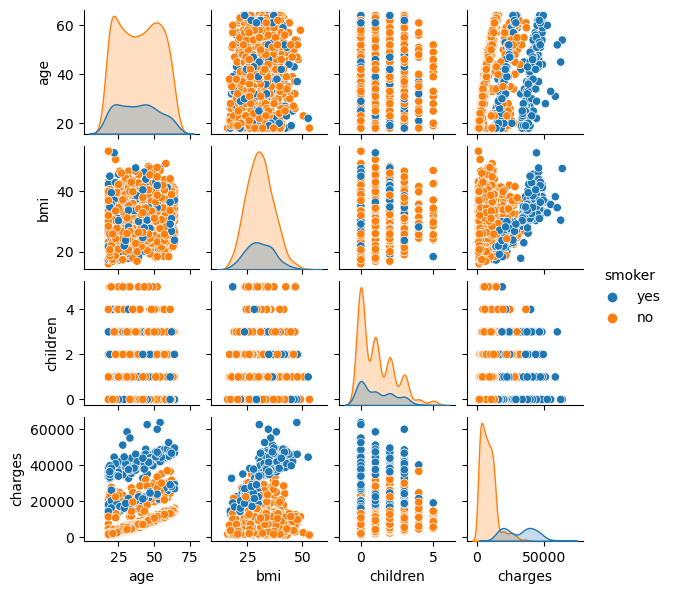

In [18]:
sns.pairplot(main_df, hue='smoker', height=1.5, aspect=1)
plt.show()

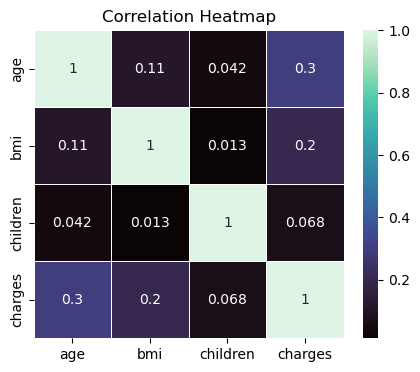

In [19]:
corr_matrix = main_df.corr(numeric_only=True)

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot = True, cmap = 'mako', linewidths = .5)
plt.title("Correlation Heatmap")
plt.show()

# Hypothesis
#### 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok.

#### Definisikan H0 & H1

H0 = Tagihan perokok $\leq$ tagihan non perokok

H1 = Tagihan perkokok > tagihan non perokok

In [20]:
var_np = np.var(smoking_charge)
var_nonnp = smoking_charge.var()

var_np, var_nonnp

(0.0, 0.0)

In [21]:
# declare variable
smoking_charge = main_df[main_df.smoker == 'yes']['charges']
nonsmoking_charge = main_df[main_df.smoker == 'no']['charges']

# find variance
var_smoking = smoking_charge.var()
var_nonsmoking = nonsmoking_charge.var()

# cek apakah variance sama
if var_smoking == var_nonsmoking:
    print('Variance smoking: ', round(var_smoking))
    print('Variance non smoking:', round(var_nonsmoking))
    print('Variance sama.')
else:
    print('Variance smoking: ', round(var_smoking))
    print('Variance non smoking:', round(var_nonsmoking))
    print('Varicance tidak sama.')

Variance smoking:  133207311
Variance non smoking: 35925420
Varicance tidak sama.


In [23]:
# karena variance tidak sama, maka akan di-set equal_var=False
stat, p_value = stats.ttest_ind(smoking_charge, nonsmoking_charge, equal_var=False, alternative='greater')

alpha = .05

print('t-statistic:', stat)
print('p-value:', round(p_value, 2))
print('Significance level:', alpha)

if p_value > alpha:
    print('')
    print(f'Result: Fail to reject H0')
else:
    print('')
    print(f'Result: Reject H0')

t-statistic: 32.751887766341824
p-value: 0.0
Significance level: 0.05

Result: Reject H0


#### 2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25.

#### Definisikan H0 & H1

H0 = Tagihan dengan BMI diatas 25 $\leq$ tagihan dengan BMI dibawah 25

H1 = Tagihan dengan BMI diatas 25 > tagihan dengan BMI dibawah 25

In [216]:
# declare variable
above_25 = main_df[main_df.bmi > 25]['charges']
below_25 = main_df[main_df.bmi <= 25]['charges']

# find mean
above_25_mean = round(above_25.mean(), 2)
below_25_mean = round(below_25.mean(), 2)

#find variance
above_25_var = round(above_25.var(), 1)
below_25_var = round(below_25.var(), 1)

# cek apakah variance sama
if above_25_var == below_25_var:
    print('Variance tagihan dengan BMI > 25:', above_25_var)
    print('Variance tagihan dengan BMI <= 25:', below_25_var)
    print('Variance sama.')
else:
    print('Variance tagihan dengan BMI > 25: ', above_25_var)
    print('Variance tagihan dengan BMI <= 25:', below_25_var)
    print('Varicance tidak sama.')

Variance tagihan dengan BMI > 25:  164730179.6
Variance tagihan dengan BMI <= 25: 56167439.8
Varicance tidak sama.


In [218]:
alpha = .05
stat, p_value = stats.ttest_ind(above_25, below_25,
                                equal_var=False,
                                alternative='greater')

print('t-statistic:', round(stat, 2))
print('p-value:', round(p_value, 2))
print('Significance level:', alpha)

# menampilkan kesimpulan
if p_value > alpha:
    print('')
    print(f'Result: Fail to reject H0')
else:
    print('')
    print(f'Result: Reject H0')

t-statistic: 5.95
p-value: 0.0
Significance level: 0.05

Result: Reject H0


#### 3. Tagihan kesehatan pria lebih besar dari wanita.

#### Definisikan H0 & H1

H0 = Tagihan pria $\leq$ tagihan wanita

H1 = Tagihan pria > tagihan wanita

In [219]:
# declare variable
male_charge = main_df[main_df.sex == 'male']['charges']
female_charge = main_df[main_df.sex == 'female']['charges']

#find variance
male_var = round(male_charge.var(), 1)
female_var = round(below_25.var(), 1)

# cek apakah variance sama
if above_25_var == below_25_var:
    print('Variance tagihan pria:', male_var)
    print('Variance tagihan wanita:', female_var)
    print('Variance sama.')
else:
    print('Variance tagihan pria: ', male_var)
    print('Variance tagihan wanita:', female_var)
    print('Varicance tidak sama.')

Variance tagihan pria:  168247513.3
Variance tagihan wanita: 56167439.8
Varicance tidak sama.


In [222]:
alpha = .05
stat, p_value = stats.ttest_ind(male_charge,
                                female_charge,
                                equal_var=False,
                                alternative='greater')

print('t-statistic:', round(stat, 2))
print('p-value:', round(p_value, 2))
print('Significance level:', alpha)

# menampilkan kesimpulan
if p_value > alpha:
    print('')
    print(f'Result: Fail to reject H0')
else:
    print('')
    print(f'Result: Reject H0')

t-statistic: 2.1
p-value: 0.02
Significance level: 0.05

Result: Reject H0
